# Exercise 05 - Diego Fernando López Castillo Cod: 200919053

## 4.1 Little Red Riding Hood Network 

### Train Neural Network - with Sklearn

In [14]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [36]:
X = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
y = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])
clf = MLPClassifier(solver='lbfgs', alpha=0.05, hidden_layer_sizes=(3,2), activation='relu', random_state=1)
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
clf.predict([[1,0,1,0],[0,1,0,0],[1,1,0,0]])

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [17]:
[coef.shape for coef in clf.coefs_]

[(4, 3), (3, 2), (2, 4)]

#### Prediccion de la P(y|x)

In [19]:
clf.predict_proba([[0,1,0,1],[0,0,1,1]])

array([[3.40438658e-02, 6.41369889e-01, 9.65986145e-01, 4.44691430e-02],
       [1.02696299e-04, 9.40309564e-01, 9.99897178e-01, 6.68983740e-01]])

In [20]:
print("Training set score: %f" % clf.score(X,y))
print("Training set loss: %f" % clf.loss_)

Training set score: 1.000000
Training set loss: 0.258756


#### Neural Network with Kereas

In [42]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
NN_mod = Sequential()

NN_mod.add(Dense(units=20, input_dim=4))
NN_mod.add(Activation('relu'))
NN_mod.add(Dense(units=1))
NN_mod.add(Activation('sigmoid'))

NN_mod.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_25 (Dense)               (None, 20)                  100        
______________________________________________________________________
activation_25 (Activation)     (None, 20)                  0          
______________________________________________________________________
dense_26 (Dense)               (None, 1)                   21         
______________________________________________________________________
activation_26 (Activation)     (None, 1)                   0          
Total params: 121
Trainable params: 121
Non-trainable params: 0
______________________________________________________________________


In [44]:
from keras.optimizers import SGD
NN_mod.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [1]:
import pybrain
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet

In [7]:
def print_pred2(dataset, network):
    df = pd.DataFrame(dataset.data['sample'][:dataset.getLength()],columns=['X', 'Y'])
    prediction = np.round(network.activateOnDataset(dataset),3)
    df['output'] = pd.DataFrame(prediction)
    return df


In [8]:
from pybrain.tools.validation import Validator

validator =  Validator()
#Se dan ejemplos de entrenamiento
Dlrrh = SupervisedDataSet(4,4) 
Dlrrh.addSample([1,1,0,0],[1,0,0,0])
Dlrrh.addSample([0,1,1,0],[0,0,1,1])
Dlrrh.addSample([0,0,0,1],[0,1,1,0])
#percepciones
df = pd.DataFrame(Dlrrh['input'],columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
#acciones
print (df.join(pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss'])))
#4 entradas, 3 neuronas intermedias, 4 salidas. Funciones sigmoides
net = buildNetwork(4, 3, 4, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)

   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0       1.0        1.0       0.0       0.0     1.0  0.0   0.0   0.0
1       0.0        1.0       1.0       0.0     0.0  0.0   1.0   1.0
2       0.0        0.0       0.0       1.0     0.0  1.0   1.0   0.0


## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.


#### Solution

In [13]:
from sklearn.datasets import load_boston
import pandas as pd

In [47]:
from sklearn import datasets

In [68]:
boston = load_boston()

In [69]:
data_boston = pd.DataFrame(boston.data,columns=boston.feature_names)

In [70]:
data_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [72]:
data_boston['MEDV'] = boston.target

In [73]:
data_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [74]:
data_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.


#### Solution

In [82]:
data_filtered = data_boston[['LSTAT','INDUS','NOX','RM','AGE','MEDV']]

In [83]:
data_filtered.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


In [99]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix


C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002170B59F7F0>,
      dtype=object)

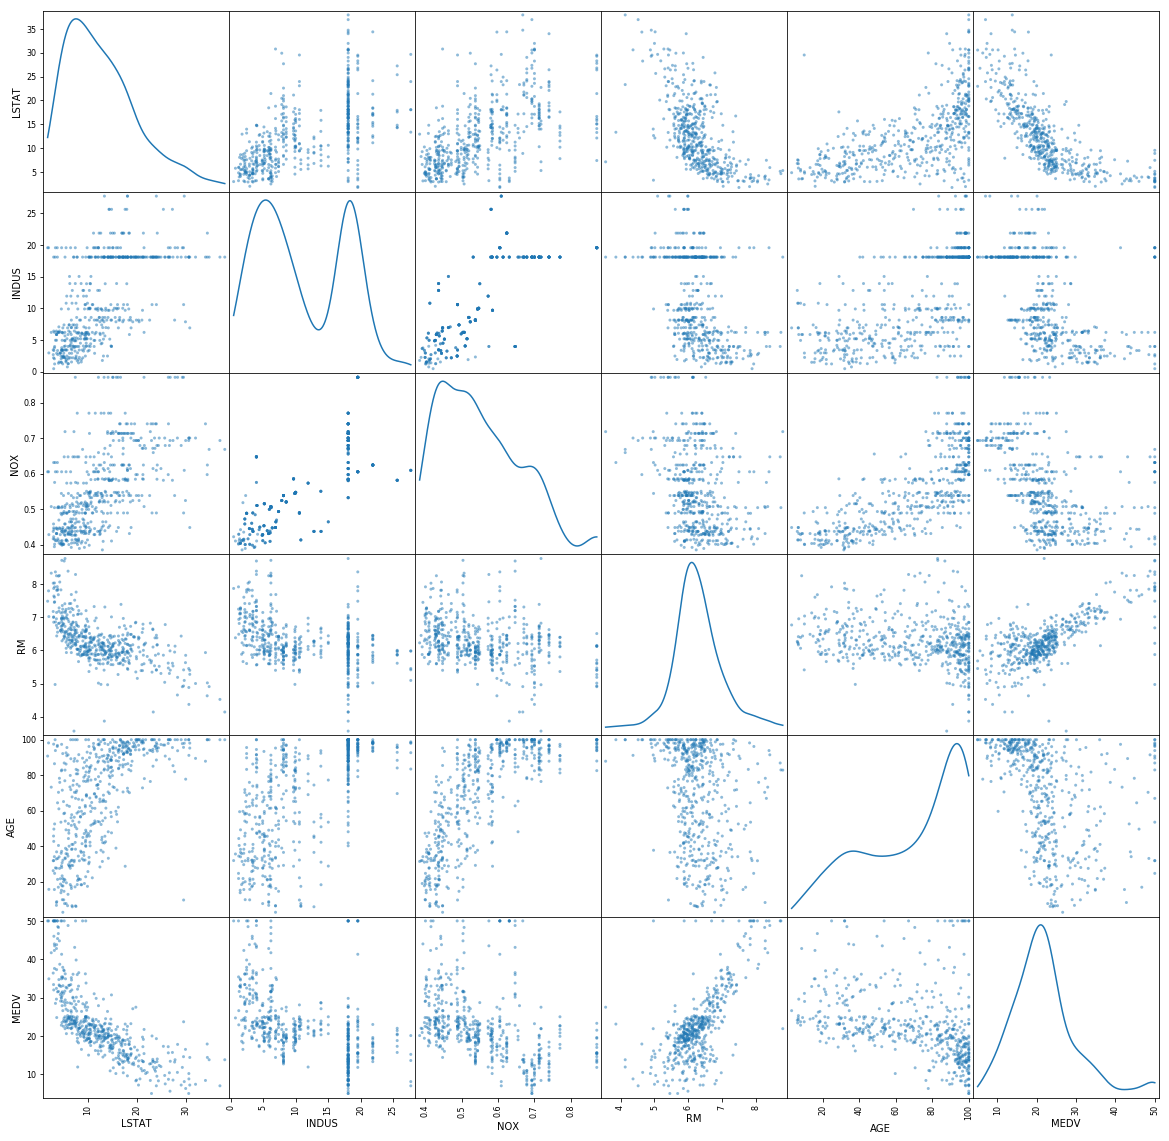

In [100]:
scatter_matrix(data_filtered,alpha=0.5,figsize=(20, 20),diagonal='kde')

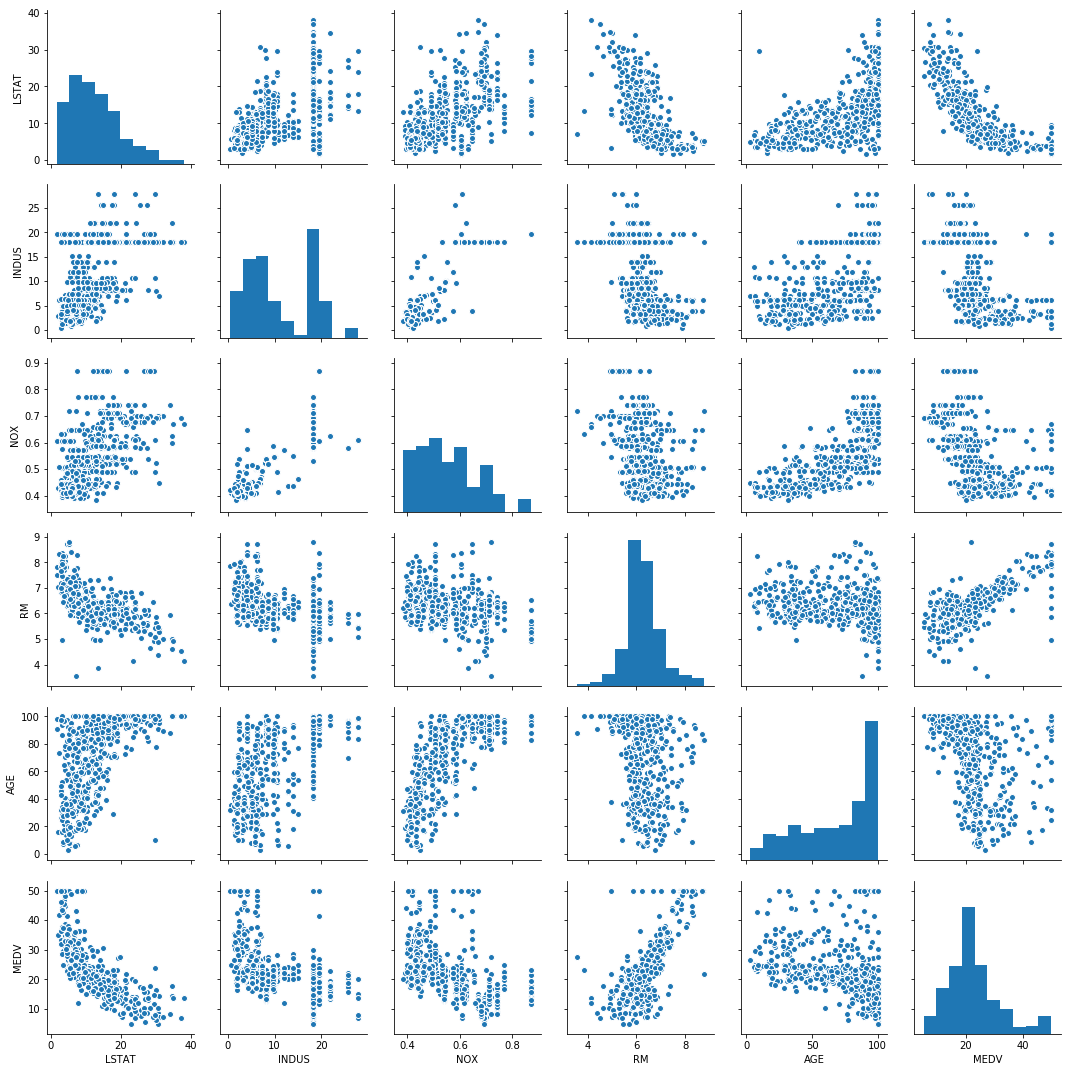

In [102]:
import seaborn as sns 
sns.pairplot(data_filtered)

Al revisar los graficos generados encontramos una relacion inversa entre el MEDV y LSTAT, lo ucal era un comportamiento que podria esperarse.

In [111]:
import numpy as np

data_filtered.corr(method='pearson')

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


In [114]:
np.corrcoef(data_filtered)

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

##### Heatmap Corr

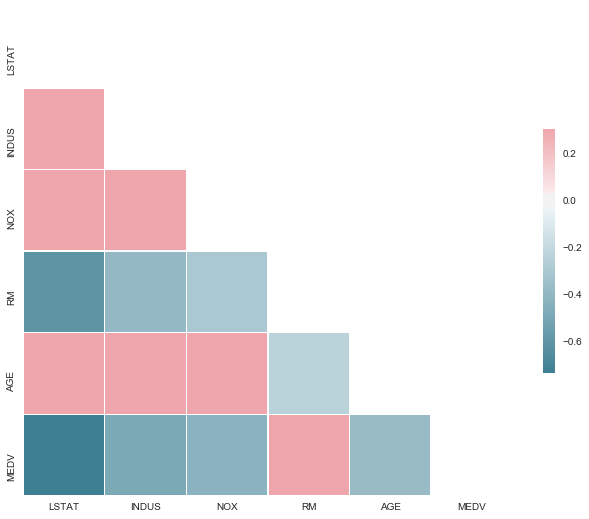

In [206]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

d =data_filtered

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

In [216]:
X1=data_boston[['RM']]
X2=data_boston[['LSTAT']]
y=data_boston[['MEDV']]

##### Generate Train and test partition for D1 and D2

In [217]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=0)

In [219]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Text(0,0.5,'MEDV')

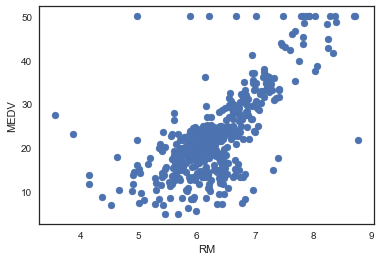

In [251]:
plt.scatter(X1.values,y.values)
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0,0.5,'MEDV')

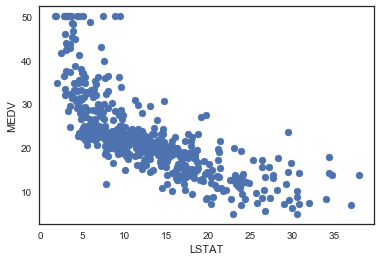

In [252]:
plt.scatter(X2.values,y.values)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [234]:
linreg1 = LinearRegression()
linreg1.fit(X1_train,y1_train)
y_pred1 = linreg1.predict(X1_test)
mse1 = 'MSE D1:', metrics.mean_squared_error(y1_test, y_pred1)
mse1

('MSE D1:', 47.03304747975518)

In [235]:
linreg2 = LinearRegression()
linreg2.fit(X2_train,y2_train)
y_pred2 = linreg2.predict(X2_test)
mse2 = 'MSE D2:', metrics.mean_squared_error(y2_test, y_pred2)
mse2

('MSE D2:', 39.81715050474416)

In [259]:
print ("El coneficiente la regresion D1 w =",linreg1.coef_)

El coneficiente la regresion D1 w = [[9.31132806]]


In [260]:
print ("El coneficiente para la regresion D1 w0 =",linreg1.intercept_)

El coneficiente para la regresion D1 w0 = [-35.99434898]


In [261]:
print ("El coneficiente la regresion D2 w =",linreg2.coef_)

El coneficiente la regresion D2 w = [[-0.96814078]]


In [262]:
print ("El coneficiente para la regresion D2 w0 =",linreg2.intercept_)

El coneficiente para la regresion D2 w0 = [34.78978059]


Text(0.5,0,'RM')

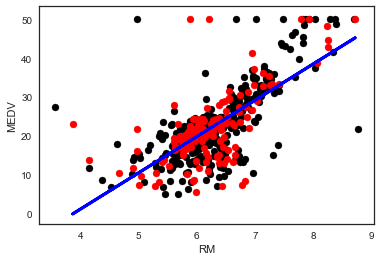

In [267]:
plt.scatter(X1_train.values, y1_train.values,  color='black')
plt.scatter(X1_test.values, y1_test.values,  color='red')
plt.plot(X1_test.values, y_pred1, color='blue', linewidth=3)
plt.ylabel('MEDV')
plt.xlabel('RM')

In [270]:
R2=linreg1.score(X1_train, y1_train, sample_weight=None)
R2

0.5026497630040827

Text(0.5,0,'LSTAT')

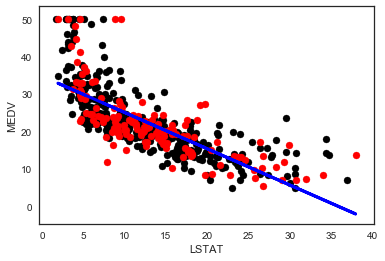

In [266]:
plt.scatter(X2_train.values, y2_train.values,  color='black')
plt.scatter(X2_test.values, y2_test.values,  color='red')
plt.plot(X2_test.values, y_pred2, color='blue', linewidth=3)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')


In [271]:
R2=linreg2.score(X2_train, y2_train, sample_weight=None)
R2

0.5524780757890007

Los modelos presentados para D1 y D2, no presentan un buen ajuste dado que abarcan unicamente el 0.5 y 0.55 de la variabilidad del MEDV

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [291]:
XF=data_boston.drop(columns=['MEDV'])

In [301]:
XF_train, XF_test,yF_train,yF_test = train_test_split(XF,data_boston[['MEDV']], test_size=0.3, random_state=0)

In [302]:
XF_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


In [303]:
y_train.head()

,MEDV
141,14.4
272,24.4
135,18.1
298,22.5
122,20.5


In [310]:
linreg3=LinearRegression()
linreg3.fit(XF_train,yF_train)
y_pred3 = linreg3.predict(XF_test)
mse3 = 'El MSE :', metrics.mean_squared_error(yF_test, y_pred3)
mse3

('El MSE :', 27.18384764760318)

In [330]:
from sklearn.neural_network import MLPRegressor
MLPreg = MLPRegressor(activation='relu',solver='lbfgs',max_iter=2000)

In [331]:
MLPreg.fit(XF_train,yF_train)

C:\Users\diego\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [332]:
y_predMLP = MLPreg.predict(XF_test)
mse4 = 'El MSE :', metrics.mean_squared_error(yF_test, y_predMLP)
mse4

('El MSE :', 19.965198788016394)

In [337]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(XF)
XF_train_s = sc_x.transform(XF_train)
XF_test_s = sc_x.transform(XF_test)

In [338]:
linreg5=LinearRegression()
linreg5.fit(XF_train_s,yF_train)
y_pred5 = linreg5.predict(XF_test_s)
mse5 = 'El MSE :', metrics.mean_squared_error(yF_test, y_pred5)
mse5

('El MSE :', 27.18384764760319)

In [340]:
from sklearn.neural_network import MLPRegressor
MLPreg2 = MLPRegressor(hidden_layer_sizes=(128,512),activation='relu',solver='lbfgs',max_iter=2000)
MLPreg2.fit(XF_train_s,yF_train)
y_predMLP2 = MLPreg2.predict(XF_test_s)
mse6 = 'El MSE :', metrics.mean_squared_error(yF_test, y_predMLP2)
mse6

C:\Users\diego\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('El MSE :', 18.25377318863735)

### El mejor modelo es el MLP incluyendo 128 neuronas y 512 en el segundo, teniendo el MSE de 18.2537 que es el más pequeño de los modelos realizados